Found 96 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/100
3/3 [==============================] - 43s 14s/step - loss: 11.7654 - accuracy: 0.5417 - val_loss: 3.4301 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 31s 10s/step - loss: 4.3464 - accuracy: 0.6042 - val_loss: 1.5342 - val_accuracy: 0.8333
Epoch 3/100
3/3 [==============================] - 31s 10s/step - loss: 2.5107 - accuracy: 0.7917 - val_loss: 3.3546 - val_accuracy: 0.6667
Epoch 4/100
3/3 [==============================] - 33s 11s/step - loss: 1.1479 - accuracy: 0.8229 - val_loss: 1.8586 - val_accuracy: 0.7917
Epoch 5/100
3/3 [==============================] - 35s 13s/step - loss: 1.0619 - accuracy: 0.8958 - val_loss: 1.4899 - val_accuracy: 0.7917
Epoch 6/100
3/3 [==============================] - 31s 10s/step - loss: 0.3741 - accuracy: 0.9271 - val_loss: 1.5370 - val_accuracy: 0.8750
Epoch 7/100
3/3 [==============================] - 36s 13s/step - loss: 0.3584 

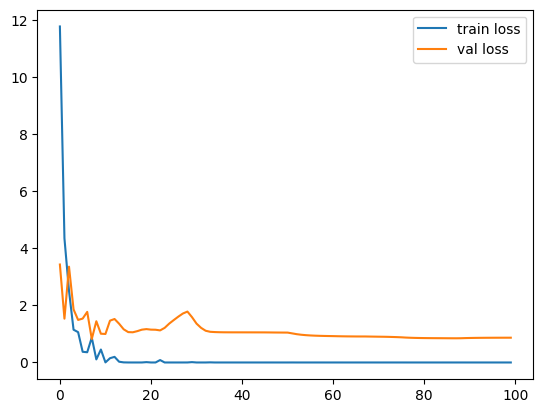

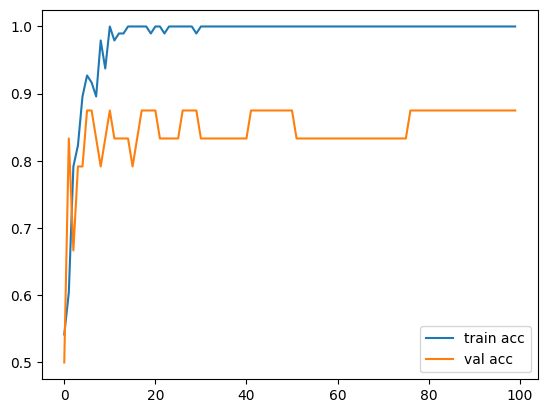

<ipython-input-23-dd5f871c0d67>:83: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_scores = model.evaluate_generator(training_set, steps=len(training_set))


Training Accuracy: 100.00%


<ipython-input-23-dd5f871c0d67>:87: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_scores = model.evaluate_generator(test_set, steps=len(test_set))


Testing Accuracy: 87.50%


In [ ]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [299, 299]  # InceptionV3 requires input shape of (299, 299)

train_path = '/content/drive/MyDrive/2Classes/train'
valid_path = '/content/drive/MyDrive/2Classes/test'

# add preprocessing layer to the front of InceptionV3
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception.layers:
  layer.trainable = False

# useful for getting number of classes
folders = glob('/content/drive/MyDrive/2Classes/train/*')

# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Image Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/2Classes/train',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/2Classes/test',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# Fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Evaluate the model on training data
train_scores = model.evaluate_generator(training_set, steps=len(training_set))
print("Training Accuracy: %.2f%%" % (train_scores[1] * 100))

# Evaluate the model on testing data
test_scores = model.evaluate_generator(test_set, steps=len(test_set))
print("Testing Accuracy: %.2f%%" % (test_scores[1] * 100))


In [ ]:
# model.save('/content/drive/MyDrive/2Classes/inceptionV3_model_10_2Classes.h5')

In [ ]:
from keras.preprocessing import image as keras_image
import numpy as np


img_path = '/content/drive/MyDrive/2Classes/test/002.Laysan_Albatross/Laysan_Albatross_0004_930.jpg'

# Preprocess the image
img = keras_image.load_img(img_path, target_size=(299, 299))
img_array = keras_image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode the predictions
predicted_class_index = np.argmax(predictions)
predicted_class_percentage = np.max(predictions) * 100

# Printing predicted class and prediction percentage
print("Predicted class:", predicted_class_index)
print("Prediction percentage:", predicted_class_percentage)


1/1 [==============================] - 2s 2s/step
Predicted class: 1
Prediction percentage: 100.0
